In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data = pd.read_csv("../data/wbes_sintetico.csv")
data = data.dropna()

In [6]:
data.shape

(1035, 11)

In [7]:
data.head()

,employees,firm_age_years,training,access_finance,exporter,digital_payments,competition_level,sector,sales_annual_usd,labor_productivity_usd_per_employee,successful
0,13.0,10.0,1.0,1.0,0,1,Media,Manufactura,42879.327130,5374.714150,1
1,9.0,6.0,0.0,0.0,0,1,Baja,Servicios,54570.897174,4728.282631,0
2,15.0,10.0,0.0,0.0,1,1,Baja,Servicios,56311.260030,3104.627628,0
3,25.0,12.0,1.0,0.0,1,1,Baja,Servicios,93419.359675,3129.017055,1
4,9.0,9.0,0.0,0.0,0,0,Baja,Manufactura,24608.889361,2824.645056,1


In [8]:
X_train = np.array(data['sales_annual_usd']).reshape(-1,1)
Y_train = np.array(data['labor_productivity_usd_per_employee'])

In [9]:
r = linear_model.LinearRegression()
r.fit(X_train, Y_train)
y_pred = r.predict(X_train)

print('Coeficiente de correlacion: ', r.coef_)
print('Interseccion: ', r.intercept_)
print('Error cuadratico de la media', mean_squared_error(Y_train, y_pred))
print('Varianza: ', r2_score(Y_train, y_pred))

Coeficiente de correlacion:  [0.0339429]
Interseccion:  1967.199295334236
Error cuadratico de la media 3245653.019673129
Varianza:  0.09612013753242843


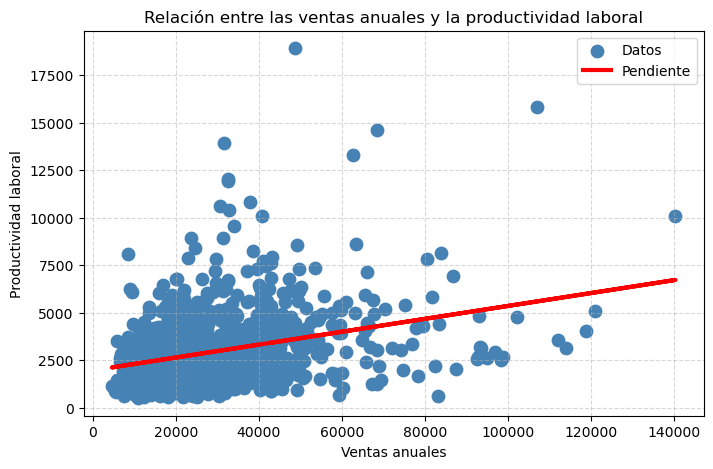

In [11]:
x = X_train.ravel()
plt.figure(figsize=(8,5))
plt.scatter(x, Y_train, color='steelblue', s=80, label='Datos')
plt.plot(x, y_pred, color='red', linewidth=3, label='Pendiente')
plt.xlabel('Ventas anuales')
plt.ylabel('Productividad laboral')
plt.title('Relación entre las ventas anuales y la productividad laboral')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()